# Task 1

In [2]:
import numpy as np
import sys
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import preprocessing
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
le = preprocessing.LabelEncoder()

In [3]:
X = np.array([[3,5],
             [3,4],
             [2,8],
             [2,3],
             [6,2],
             [6,4],
             [7,3],
             [7,4],
             [8,5],
             [7,6],])

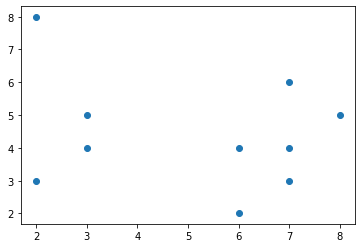

In [4]:
plt.scatter(X[:,0],X[:,1], label='True Position')

In [5]:
#Euclidean & Manhattan distance equations are as below
def Euclideandistance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
def Manhattandistance(point1, point2):
    return np.sum(np.absolute(point1 - point2))

In [6]:
#implementating KMeans
def KMeans(X,start_centers,dist):
    cluster0 = []
    cluster1 = []
    Manha_cluster0 = []
    Manha_cluster1 = []
    if(dist == Euclideandistance):
        for i in X:
            if(Euclideandistance(i,start_centers[0])> Euclideandistance(i,start_centers[1]) ):
                cluster1.append(i)
            else:
                cluster0.append(i)
        return cluster0, cluster1
    
    if(dist == Manhattandistance):
        for i in X:
            if(Manhattandistance(i,start_centers[0])> Manhattandistance(i,start_centers[1]) ):
                Manha_cluster1.append(i)
            else:
                Manha_cluster0.append(i)
        return Manha_cluster0, Manha_cluster1

In [7]:
#Updating centroids as below
def Updatecluster(cluster0,cluster1):
    sum = 0
    for i in range(len(cluster0)):
        sum = sum + cluster0[i][0]
    sum/len(cluster0)
    sum1 = 0
    for j in range(len(cluster0)):
        sum1 = sum1 + cluster0[j][1]
    sum1/len(cluster0)
    newcluster0 = np.array([sum/len(cluster0),sum1/len(cluster0)])
    sum = 0
    for i in range(len(cluster1)):
        sum = sum + cluster1[i][0]
    sum/len(cluster1)
    sum1 = 0
    for j in range(len(cluster1)):
        sum1 = sum1 + cluster1[j][1]
    sum1/len(cluster1)
    newcluster1 = np.array([sum/len(cluster1),sum1/len(cluster1)])
    return newcluster0, newcluster1


In [8]:
#initial centroids (4,6) & (5,4) and their Euclidean dist 
start_cen = np.array([[4,6],[5,4]])
cluster0, cluster1 = KMeans(X,start_cen,Euclideandistance)
newcluster0, newcluster1 = Updatecluster(cluster0, cluster1)

In [9]:
new_starting_cen = [newcluster0, newcluster1]

In [10]:
new_starting_cen

[array([2.5, 6.5]), array([5.75 , 3.875])]

In [11]:
cluster0, cluster1

([array([3, 5]), array([2, 8])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [12]:
itera = 1
notConver = True
while(notConver):
    itera = itera+1
    startCen = new_starting_cen
    cluster0, cluster1 = KMeans(X,new_starting_cen,Euclideandistance)
    newcluster0, newcluster1 = Updatecluster(cluster0, cluster1)
    new_starting_cen = [newcluster0, newcluster1]
    if ((startCen[0] == new_starting_cen[0]).all() and (startCen[1] == new_starting_cen[1]).all()):
        notConver = False
        break
print(itera)
print(newcluster0, newcluster1)

3
[2.5 5. ] [6.83333333 4.        ]


In [13]:
cluster0, cluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [14]:
#initial centroids (4,6) & (5,4) and their Manhattan distance 
startCen = np.array([[4,6],[5,4]])
Manhcluster0, Manhcluster1 = KMeans(X,startCen,Manhattandistance)
ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)

In [15]:
ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]

In [16]:
ManhNewStart_cen

[array([4.        , 6.33333333]), array([5.57142857, 3.57142857])]

In [17]:
Manhcluster0, Manhcluster1

([array([3, 5]), array([2, 8]), array([7, 6])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5])])

In [18]:
itera = 1
notConver = True
while(notConver):
    itera = itera+1
    startCenters = ManhNewStart_cen
    Manhcluster0, Manhcluster1 = KMeans(X,ManhNewStart_cen,Manhattandistance)
    ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)
    ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]
    if ((startCenters[0] == ManhNewStart_cen[0]).all() and (startCenters[1] == ManhNewStart_cen[1]).all()):
        notConver = False
        break
print(itera)
print(ManhNewcluster0, ManhNewcluster1)

2
[4.         6.33333333] [5.57142857 3.57142857]


In [19]:
Manhcluster0, Manhcluster1

([array([3, 5]), array([2, 8]), array([7, 6])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5])])

In [20]:
#initial centroids (3,3) & (8,3) and their Manhattan dist 
startCenters = np.array([[3,3],[8,3]])
Manhcluster0, Manhcluster1 = KMeans(X,startCenters,Manhattandistance)
ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)

In [21]:
ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]

In [22]:
ManhNewStart_cen

[array([2.5, 5. ]), array([6.83333333, 4.        ])]

In [23]:
Manhcluster0, Manhcluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [24]:
itera = 1
notConver = True
while(notConver):
    itera = itera+1
    start_cen = ManhNewStart_cen
    Manhcluster0, Manhcluster1 = KMeans(X,ManhNewStart_cen,Manhattandistance)
    ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)
    ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]
    if ((start_cen[0] == ManhNewStart_cen[0]).all() and (start_cen[1] == ManhNewStart_cen[1]).all()):
        notConver = False
        break
print(itera)
print(ManhNewcluster0, ManhNewcluster1)

2
[2.5 5. ] [6.83333333 4.        ]


In [25]:
Manhcluster0, Manhcluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [26]:
#initial centroids (3,2) & (4,8) and their Manhattan dist 
start_cen = np.array([[3,2],[4,8]])
Manhcluster0, Manhcluster1 = KMeans(X,start_cen,Manhattandistance)
ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)

In [27]:
ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]

In [28]:
ManhNewStart_cen

[array([4.85714286, 3.57142857]), array([5.66666667, 6.33333333])]

In [29]:
Manhcluster0, Manhcluster1

([array([3, 5]),
  array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4])],
 [array([2, 8]), array([8, 5]), array([7, 6])])

In [30]:
itera = 1
notConver = True
while(notConver):
    itera = itera+1
    start_cen = ManhNewStart_cen
    Manhcluster0, Manhcluster1 = KMeans(X,ManhNewStart_cen,Manhattandistance)
    ManhNewcluster0, ManhNewcluster1 = Updatecluster(Manhcluster0, Manhcluster1)
    ManhNewStart_cen = [ManhNewcluster0, ManhNewcluster1]
    if ((start_cen[0] == ManhNewStart_cen[0]).all() and (start_cen[1] == ManhNewStart_cen[1]).all()):
        notConver = False
        break
print(itera)
print(ManhNewcluster0, ManhNewcluster1)

2
[4.85714286 3.57142857] [5.66666667 6.33333333]


In [31]:
Manhcluster0, Manhcluster1

([array([3, 5]),
  array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4])],
 [array([2, 8]), array([8, 5]), array([7, 6])])

# Task 2

In [189]:
iris_df = pd.read_csv('../input/iris.csv')

In [190]:
iris_df.columns.values
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [191]:
iris_df['class'] = le.fit_transform(iris_df['class'])
X = iris_df.iloc[:,[0,1,2,3,4]].values
Y = iris_df.iloc[:,[4]].values
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

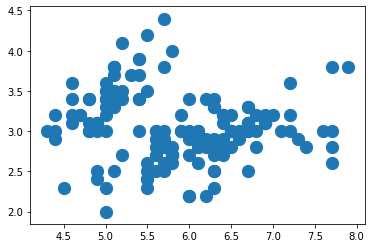

In [192]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [193]:
#Calculating cosine distance 
def cosineDistance(p1, p2):
    return distance.cosine(p1,p2)

In [194]:
#Calculating Euclidean distance
def EuclideanDistance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [195]:
#Calculating Jaccard distance
def JaccardDistance(point1, point2):
    numer = 0
    denom = 0
    for i in range(len(point1)):
        numer = numer + min(point1[i],point2[i])
        denom = denom + max(point1[i],point2[i])
    distance = 1 - numer/denom
    return distance

In [196]:
#computing SSE
def SSE(point1,point2):
    squaredError = (point1 - point2) **2
    return np.sum(squaredError)

In [197]:
#Implementing K-means
def KMean(data,distance):
    centroids = {}
    EuclIter = 0
    CosiIter = 0 
    JaccIter = 0
    classes = {}
    target = {}
    currSSE = 0
    PrevSSE = 0
   
    #Initialising centroids with K value as 3
    for i in range(3):
        centroids[i] = data[i][0:4]
    iter = True
    iterations = 0
    while(iter):
        iterations = iterations+1
        if(distance == EuclideanDistance):
            EuclIter = EuclIter + 1
        if(distance == cosineDistance):
            CosiIter = CosiIter + 1
        if(distance == JaccardDistance):
            JaccIter = JaccIter + 1
    
        classes = {}
        target = {}
        labelArr = []
        for classKy in range(3):
            classes[classKy] = []
            target[classKy] = []
    
        for dataP in data: 
            Distances = []
            for centroid in centroids:
                if(distance == EuclideanDistance):
                    dist = EuclideanDistance(dataP[0:4], centroids[centroid])
                    Distances.append(dist)
                if(distance == cosineDistance):
                    dist = cosineDistance(dataP[0:4], centroids[centroid])
                    Distances.append(dist)
                if(distance == JaccardDistance):
                    dist = JaccardDistance(dataP[0:4], centroids[centroid])
                    Distances.append(dist)

            miniDist = min(Distances)
            miniDistIndex = Distances.index(miniDist)
            classes[miniDistIndex].append(dataP[0:4])
            target[miniDistIndex].append(dataP[4])
        
            
           
        old_centrd = dict(centroids)
        
        SSEClass0 = 0
        SSEClass1 = 0 
        SSEClass2 = 0

        for i in range(len(classes[0])):
            SSEClass0 = SSEClass0 + SSE(classes[0][i],centroids[0])
        for i in range(len(classes[1])):
            SSEClass1 = SSEClass1 + SSE(classes[1][i],centroids[1])
        for i in range(len(classes[2])):
            SSEClass2 = SSEClass2 + SSE(classes[2][i],centroids[2])
        currentSSE = SSEClass0 + SSEClass1 + SSEClass2
        print("Iterations",iterations)
        print("Current SSE value",currentSSE)
        print("Previous SSE value",PrevSSE)
        
        if(currentSSE <= PrevSSE):
            iter = True
        if(currentSSE >= PrevSSE):
            iter = False
        if(iterations == 1):
            iter = True

        PrevSSE = currentSSE
        
       
    
    #new centroids
        for classKy in classes:
            class_data = classes[classKy]
            New_centroid = np.mean(class_data, axis = 0)
            centroids[classKy] = New_centroid

        for centroid in old_centrd:
            oldCentro = old_centrd[centroid]
            curren = centroids[centroid]


    
    #Accuracies are calculated
    labelArr = {}
    corrct_class = 0
    for targetKy in target:
        labelArr[targetKy] = []
        count0 = 0
        count1 = 0
        count2 = 0
        for i in range(len(target[targetKy])):
            if(target[targetKy][i] == 1.0):
                count1 = count1+1
            if(target[targetKy][i] == 2.0):
                count2 = count2+1
            if(target[targetKy][i] == 0.0):
                count0 =count0+1
        print("Count of 0,1,2 classes in", targetKy, "cluster :" , count0,count1,count2)
        if(count0 == max(count0,count1,count2)):
            labelArr[targetKy].append(0)
            corrct_class = corrct_class+ count0
        elif(count1 == max(count0,count1,count2)):
            labelArr[targetKy].append(1)
            corrct_class = corrct_class+ count1
        elif(count2 == max(count0,count1,count2)):
            labelArr[targetKy].append(2)
            corrct_class = corrct_class+ count2
                    
        print("The values of Predicted class in ",targetKy, " and cluster  :", target[targetKy])
    print("Labels",labelArr)
    Accurcy =   corrct_class/150 * 100;
    print("Euclidean_ITR",EuclIter)
    print("Cosine_ITR",CosiIter)
    print("Jaccard_ITR",JaccIter)
    print("Accuracy",Accurcy)
    return centroids, classes

In [198]:
centroids, classes = KMean(X,EuclideanDistance)

Iterations 1
Current SSE value 1755.190000000001
Previous SSE value 0
Iterations 2
Current SSE value 244.54604885954535
Previous SSE value 1755.190000000001
Iterations 3
Current SSE value 87.84033914272501
Previous SSE value 244.54604885954535
Iterations 4
Current SSE value 85.04157943238867
Previous SSE value 87.84033914272501
Iterations 5
Current SSE value 84.10217888865152
Previous SSE value 85.04157943238867
Iterations 6
Current SSE value 83.13638186876976
Previous SSE value 84.10217888865152
Iterations 7
Current SSE value 81.83900206772623
Previous SSE value 83.13638186876976
Iterations 8
Current SSE value 80.89577600000003
Previous SSE value 81.83900206772623
Iterations 9
Current SSE value 79.96297983461304
Previous SSE value 80.89577600000003
Iterations 10
Current SSE value 79.43376414532675
Previous SSE value 79.96297983461304
Iterations 11
Current SSE value 79.01070972222223
Previous SSE value 79.43376414532675
Iterations 12
Current SSE value 78.94506582597731
Previous SSE val

In [199]:
#calculating Euclidean centroids
centroids,classes

({0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]),
  1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([7. , 3.2, 4.7, 1.4]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.7, 3. , 5. , 1.7]),
   array([6.3, 3.3, 6. , 2.5]),
   array([7.1, 3. , 5.9, 2.1]),
   array([6.3, 2.9, 5.6, 1.8]),
   array([6.5, 3. , 5.8, 2.2]),
   array([7.6, 3. , 6.6, 2.1]),
   array([7.3, 2.9, 6.3, 1.8]),
   array([6.7, 2.5, 5.8, 1.8]),
   array([7.2, 3.6, 6.1, 2.5]),
   array([6.5, 3.2, 5.1, 2. ]),
   array([6.4, 2.7, 5.3, 1.9]),
   array([6.8, 3. , 5.5, 2.1]),
   array([6.4, 3.2, 5.3, 2.3]),
   array([6.5, 3. , 5.5, 1.8]),
   array([7.7, 3.8, 6.7, 2.2]),
   array([7.7, 2.6, 6.9, 2.3]),
   array([6.9, 3.2, 5.7, 2.3]),
   array([7.7, 2.8, 6.7, 2. ]),
   array([6.7, 3.3, 5.7, 2.1]),
   array([7.2, 3.2, 6. , 1.8]),
   array([6.4, 2.8, 5.6, 2.1]),
   array([7.2, 3. , 5.8, 1.6]),
   array([7.4, 2.8, 6.1, 1.9]),
   array([7.9, 3.8, 6.4, 2. ])

In [200]:
CosineCentroids, CosineClasses = KMean(X, cosineDistance)

Iterations 1
Current SSE value 1790.4599999999994
Previous SSE value 0
Iterations 2
Current SSE value 170.97680380597478
Previous SSE value 1790.4599999999994
Iterations 3
Current SSE value 152.3969571050643
Previous SSE value 170.97680380597478
Iterations 4
Current SSE value 152.3121029411765
Previous SSE value 152.3969571050643
Iterations 5
Current SSE value 152.3121029411765
Previous SSE value 152.3121029411765
Count of 0,1,2 classes in 0 cluster : 16 0 0
The values of Predicted class in  0  and cluster  : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Count of 0,1,2 classes in 1 cluster : 0 50 50
The values of Predicted class in  1  and cluster  : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 

In [201]:
#printing the cosine centroids & cluster data points
CosineCentroids, CosineClasses

({0: array([5.09375, 3.7375 , 1.3875 , 0.25625]),
  1: array([6.262, 2.872, 4.906, 1.676]),
  2: array([4.96470588, 3.26764706, 1.5       , 0.23823529])},
 {0: [array([5. , 3.6, 1.4, 0.2]),
   array([5.4, 3.9, 1.7, 0.4]),
   array([4.6, 3.4, 1.4, 0.3]),
   array([4.3, 3. , 1.1, 0.1]),
   array([5.8, 4. , 1.2, 0.2]),
   array([5.7, 4.4, 1.5, 0.4]),
   array([5.4, 3.9, 1.3, 0.4]),
   array([5.1, 3.8, 1.5, 0.3]),
   array([5.1, 3.7, 1.5, 0.4]),
   array([4.6, 3.6, 1. , 0.2]),
   array([5.2, 4.1, 1.5, 0.1]),
   array([5.5, 4.2, 1.4, 0.2]),
   array([5. , 3.5, 1.3, 0.3]),
   array([4.4, 3.2, 1.3, 0.2]),
   array([5.1, 3.8, 1.6, 0.2]),
   array([5.3, 3.7, 1.5, 0.2])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([5.5, 2.3, 4. , 1.3]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.2, 2.7, 3.9, 1.4]),
   arr

In [202]:
JaccardCentroids, JaccardClasses = KMean(X, JaccardDistance)

Iterations 1
Current SSE value 1765.68
Previous SSE value 0
Iterations 2
Current SSE value 209.3251003424783
Previous SSE value 1765.68
Iterations 3
Current SSE value 115.23746149584488
Previous SSE value 209.3251003424783
Iterations 4
Current SSE value 95.04706622131168
Previous SSE value 115.23746149584488
Iterations 5
Current SSE value 88.6499723133977
Previous SSE value 95.04706622131168
Iterations 6
Current SSE value 85.95814853829927
Previous SSE value 88.6499723133977
Iterations 7
Current SSE value 84.80172984452899
Previous SSE value 85.95814853829927
Iterations 8
Current SSE value 84.38502533134351
Previous SSE value 84.80172984452899
Iterations 9
Current SSE value 84.33228455008494
Previous SSE value 84.38502533134351
Iterations 10
Current SSE value 84.33228455008494
Previous SSE value 84.33228455008494
Count of 0,1,2 classes in 0 cluster : 0 36 2
The values of Predicted class in  0  and cluster  : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [203]:
JaccardCentroids,JaccardClasses

({0: array([5.69210526, 2.66578947, 4.11578947, 1.27368421]),
  1: array([6.61129032, 2.9983871 , 5.39032258, 1.92258065]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([5.5, 2.3, 4. , 1.3]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([5.9, 3. , 4.2, 1.5]),
   array([6. , 2.2, 4. , 1. ]),
   array([6.1, 2.9, 4.7, 1.4]),
   array([5.6, 2.9, 3.6, 1.3]),
   array([5.6, 3. , 4.5, 1.5]),
   array([5.8, 2.7, 4.1, 1. ]),
   array([6.2, 2.2, 4.5, 1.5]),
   array([5.6, 2.5, 3.9, 1.1]),
   array([6.1, 2.8, 4. , 1.3]),
   array([6.1, 2.8, 4.7, 1.2]),
   array([6.4, 2.9, 4.3, 1.3]),
   array([6. , 2.9, 4.5, 1.5]),
   array([5.7, 2.6, 3.5, 1. ]),
   array([5.5, 2.4, 3.8, 1.1]),
   array([5.5, 2.4, 3.7, 1. ]),
   array([5.8, 2.7, 3.9, 1.2]),
   array([5.4, 3. , 4.5, 1.5]),
   array([6. , 3.4, 4.5, 1.6]),
   array([6.3, 2.3, 4.4, 1.3]),
   array([5.6, 3. , 4.1, 1.3]),
   array([5.5, 2.5, 4. , 1.3])

In [221]:
iris_df = pd.read_csv('../input/iris.csv')

In [222]:
iris_df.columns.values
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [223]:
iris_df['class'] = le.fit_transform(iris_df['class'])

In [224]:
X = iris_df.iloc[:,[0,1,2,3,4]].values

In [225]:

Y = iris_df.iloc[:,[4]].values
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

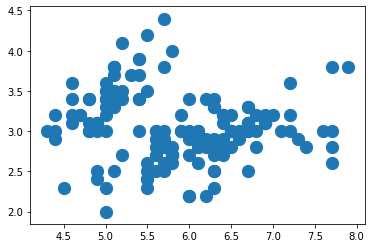

In [226]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [227]:
# cosine distance 
def cosineDistance(p1, p2):
    return distance.cosine(p1,p2)

In [228]:
# Euclidean distance
def EuclideanDistance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [229]:
# Jaccard distance
def JaccardDistance(p1, p2):
    numer = 0
    denom = 0
    for i in range(len(p1)):
        numer = numer + min(p1[i],p2[i])
        denom = denom + max(p1[i],p2[i])
    d = 1 - numer/denom
    return d

In [230]:
#when the maximum preset value (100) of iteration is complete
#K-means implementation
#K-means implementation
def KMean(data,distance):
    centrds = {}
    Eucitr = 0
    Cositr = 0 
    Jaccitr = 0
    
    # Initialising centroids K is equal to 3
    for i in range(3):
        centrds[i] = data[i][0:4]
    
    classes = {}
    target = {}
    
    for itr in range(100):
        if(distance == EuclideanDistance):
            Eucitr = Eucitr + 1
        if(distance == cosineDistance):
            Cositr = Cositr + 1
        if(distance == JaccardDistance):
            Jaccitr = Jaccitr + 1
    
        classes = {}
        target = {}
        label = []
        for k in range(3):
            classes[k] = []
            target[k] = []
    
        for dp in data: 
            Distance = []
            for c in centrds:
                if(distance == EuclideanDistance):
                    dis = EuclideanDistance(dp[0:4], centrds[c])
                    Distance.append(dis)
                if(distance == cosineDistance):
                    dis = cosineDistance(dp[0:4], centrds[c])
                    Distance.append(dis)
                if(distance == JaccardDistance):
                    dis = JaccardDistance(dp[0:4], centrds[c])
                    Distance.append(dis)

            minDis = min(Distance)
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dp[0:4])
            target[minDisIndex].append(dp[4])
        
            
           
        oldCentroid = dict(centrds)
    
    # calculating new centroids
        for classKey in classes:
            classData = classes[classKey]
            NewCentroid = np.mean(classData, axis = 0)
            centrds[classKey] = NewCentroid
        isFine = True

        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centrds[centroid]
        if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                isFine = False

        if isFine:
            break
    
    # Calculating Accuracies
    lbl = {}
    correctclass = 0
    for targetKey in target:
        lbl[targetKey] = []
        count0 = 0
        count1 = 0
        count2 = 0
        for i in range(len(target[targetKey])):
            if(target[targetKey][i] == 1.0):
                count1 = count1+1
            if(target[targetKey][i] == 2.0):
                count2 = count2+1
            if(target[targetKey][i] == 0.0):
                count0 =count0+1
        print("Count of 0,1,2 classes in", targetKey, "cluster :" , count0,count1,count2)
        if(count0 == max(count0,count1,count2)):
            lbl[targetKey].append(0)
            correctclass = correctclass+ count0
        elif(count1 == max(count0,count1,count2)):
            lbl[targetKey].append(1)
            correctclass = correctclass+ count1
        elif(count2 == max(count0,count1,count2)):
            lbl[targetKey].append(2)
            correctclass = correctclass+ count2
                    
        print("Predicted class values in ",targetKey, " cluster :", target[targetKey])
    print("Labels",lbl)
    Accuracy =   correctclass/150 * 100;
    print("Accuracy",Accuracy)
    print("E_ITR",Eucitr)
    print("C_ITR",Cositr)
    print("J_ITR",Jaccitr)
    return centrds, classes

In [231]:
centrds, classes = KMean(X,EuclideanDistance)

Count of 0,1,2 classes in 0 cluster : 0 18 49
Predicted class values in  0  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 1 cluster : 0 32 1
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 50 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [232]:
#Euclidean centroids
centrds,classes

({0: array([6.57014925, 2.9880597 , 5.33880597, 1.88507463]),
  1: array([5.63636364, 2.63636364, 4.02727273, 1.25151515]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([6.1, 2.9, 4.7, 1.4]),
   array([6.7, 3.1, 4.4, 1.4]),
   array([5.9, 3.2, 4.8, 1.8]),
   array([6.3, 2.5, 4.9, 1.5]),
   array([6.1, 2.8, 4.7, 1.2]),
   array([6.6, 3. , 4.4, 1.4]),
   array([6.8, 2.8, 4.8, 1.4]),
   array([6.7, 3. , 5. , 1.7]),
   array([6. , 2.7, 5.1, 1.6]),
   array([6. , 3.4, 4.5, 1.6]),
   array([6.7, 3.1, 4.7, 1.5]),
   array([6.1, 3. , 4.6, 1.4]),
   array([6.3, 3.3, 6. , 2.5]),
   array([5.8, 2.7, 5.1, 1.9]),
   array([7.1, 3. , 5.9, 2.1]),
   array([6.3, 2.9, 5.6, 1.8]),
   array([6.5, 3. , 5.8, 2.2]),
   array([7.6, 3. , 6.6, 2.1]),
   array([7.3, 2.9, 6.3, 1.8]),
   array([6.7, 2.5, 5.8, 1.8])

In [233]:
# SSE formula
def SSE(p1,p2):
    squd_error = (p1 - p2) **2
    return np.sum(squd_error)

In [234]:
# SSE of Euclidean
SSE_c0 = 0
SSE_c1 = 0 
SSE_c2 = 0

for i in range(len(classes[0])):
    SSE_c0 = SSE_c0 + SSE(classes[0][i],centrds[0])
for i in range(len(classes[1])):
    SSE_c1 = SSE_c1 + SSE(classes[1][i],centrds[1])
for i in range(len(classes[2])):
    SSE_c2 = SSE_c2 + SSE(classes[2][i],centrds[2])
EuclSSE = SSE_c0 + SSE_c1 + SSE_c2
EuclSSE

86.1159314337404

In [235]:
Cos_cends, Cos_cls = KMean(X, cosineDistance)

Count of 0,1,2 classes in 0 cluster : 14 0 0
Predicted class values in  0  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Count of 0,1,2 classes in 1 cluster : 0 50 50
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 36 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [236]:

#cosine centroids and cluster data points
Cos_cends, Cos_cls

({0: array([5.05714286, 3.72857143, 1.35714286, 0.25      ]),
  1: array([6.262, 2.872, 4.906, 1.676]),
  2: array([4.98611111, 3.29722222, 1.50555556, 0.24166667])},
 {0: [array([5. , 3.6, 1.4, 0.2]),
   array([4.6, 3.4, 1.4, 0.3]),
   array([4.3, 3. , 1.1, 0.1]),
   array([5.8, 4. , 1.2, 0.2]),
   array([5.7, 4.4, 1.5, 0.4]),
   array([5.4, 3.9, 1.3, 0.4]),
   array([5.1, 3.8, 1.5, 0.3]),
   array([5.1, 3.7, 1.5, 0.4]),
   array([4.6, 3.6, 1. , 0.2]),
   array([5.2, 4.1, 1.5, 0.1]),
   array([5.5, 4.2, 1.4, 0.2]),
   array([5. , 3.5, 1.3, 0.3]),
   array([4.4, 3.2, 1.3, 0.2]),
   array([5.1, 3.8, 1.6, 0.2])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([5.5, 2.3, 4. , 1.3]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([5.9, 3. , 4.2, 1

In [238]:
# SSE of Cosine 
SSE_c0 = 0
SSE_c1 = 0 
SSE_c2 = 0

for i in range(len(Cos_cls[0])):
    SSE_c0 = SSE_c0 + SSE(Cos_cls[0][i],Cos_cends[0])
for i in range(len(Cos_cls[1])):
    SSE_c1 = SSE_c1 + SSE(Cos_cls[1][i],Cos_cends[1])
for i in range(len(Cos_cls[2])):
    SSE_c2 = SSE_c2 + SSE(Cos_cls[2][i],Cos_cends[2])
Cos_SSE = SSE_c0 + SSE_c1 + SSE_c2
Cos_SSE

152.88730952380956

In [239]:
Jaccard_cends, Jaccard_cls = KMean(X, JaccardDistance)

Count of 0,1,2 classes in 0 cluster : 0 17 0
Predicted class values in  0  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Count of 0,1,2 classes in 1 cluster : 0 33 50
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 50 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [241]:

# SSE of Jaccard
SSE_c0 = 0
SSE_c1 = 0 
SSE_c2 = 0

for i in range(len(Jaccard_cls[0])):
    SSE_c0 = SSE_c0 + SSE(Jaccard_cls[0][i],Jaccard_cends[0])
for i in range(len(Jaccard_cls[1])):
    SSE_c1 = SSE_c1 + SSE(Jaccard_cls[1][i],Jaccard_cends[1])
for i in range(len(Jaccard_cls[2])):
    SSE_c2 = SSE_c2 + SSE(Jaccard_cls[2][i],Jaccard_cends[2])
Jac_SSE = SSE_c0 + SSE_c1 + SSE_c2
Jac_SSE

106.11776357193477

In [242]:

# Jaccard centrtoids and classes
Jaccard_cends,Jaccard_cls

({0: array([5.47058824, 2.48823529, 3.75882353, 1.12941176]),
  1: array([6.42409639, 2.95060241, 5.14096386, 1.78795181]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([5.5, 2.3, 4. , 1.3]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([6. , 2.2, 4. , 1. ]),
   array([5.6, 2.9, 3.6, 1.3]),
   array([5.8, 2.7, 4.1, 1. ]),
   array([5.6, 2.5, 3.9, 1.1]),
   array([5.7, 2.6, 3.5, 1. ]),
   array([5.5, 2.4, 3.8, 1.1]),
   array([5.5, 2.4, 3.7, 1. ]),
   array([5.8, 2.7, 3.9, 1.2]),
   array([5.5, 2.5, 4. , 1.3]),
   array([5.5, 2.6, 4.4, 1.2]),
   array([5.8, 2.6, 4. , 1.2]),
   array([5. , 2.3, 3.3, 1. ]),
   array([5.1, 2.5, 3. , 1.1])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.9, 3. , 4.2, 1.5]),
   array([6.1, 2.9, 4.7, 1

# Task 3

In [58]:
X = np.array([[4.7,3.2],
             [4.9,3.1],
             [5.0,3.0],
             [4.6,2.9],])
Y = np.array([[5.9,3.2],
             [6.7,3.1],
             [6.0,3.0],
             [6.2,2.8],])

In [59]:
disArr = []
x = 0
while(x < len(X)):
    y = 0
    while(y < len(Y)) :
        disArr.append(EuclideanDistance(X[x],Y[y]))
        y = y+1
    x = x+1

print("Maximum Distance",round(max(disArr),4))
print("Minimum Distance",round(min(disArr),4))
print("Average Distance",round(sum(disArr)/len(disArr),4))
print(len(disArr))

Maximum Distance 2.1095
Minimum Distance 0.922
Average Distance 1.4129
16
